In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt



In [14]:
# Load your data into a pandas DataFrame
# data = pd.read_csv('global-data-on-sustainable-energy (1).csv')
data = pd.read_csv('billionares.csv')

data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,24.2,60.7,67059887.0,46.227638,2.213749,4.0,NaN,NaN,NaN,NaN
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN


In [15]:
data = data.select_dtypes(include=[np.number])

data.head()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,...,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,1,211000,74.0,1949.0,3.0,5.0,110.05,1.1,2.715520e+12,65.6,...,24.2,60.7,67059887.0,46.227638,2.213749,4.0,NaN,NaN,NaN,NaN
1,2,180000,51.0,1971.0,6.0,28.0,117.24,7.5,2.142770e+13,88.2,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
2,3,114000,59.0,1964.0,1.0,12.0,117.24,7.5,2.142770e+13,88.2,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
3,4,107000,78.0,1944.0,8.0,17.0,117.24,7.5,2.142770e+13,88.2,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN
4,5,106000,92.0,1930.0,8.0,30.0,117.24,7.5,2.142770e+13,88.2,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,NaN,NaN


In [16]:

data = data.fillna(data.median())

data.head()


,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,...,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Table2.Country Time Required to Start a Business,"Table1.Country % Reaching grade 5 , male","Table1.Country % Reaching grade 5, female","Table1.Country % Reaching last grade of primary education, male","Table1.Country % Reaching last grade of primary education, female"
0,1,211000,74.0,1949.0,3.0,5.0,110.05,1.1,2.715520e+12,65.6,...,24.2,60.7,67059887.0,46.227638,2.213749,4.0,99.0,99.0,98.0,97.0
1,2,180000,51.0,1971.0,6.0,28.0,117.24,7.5,2.142770e+13,88.2,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,98.0,97.0
2,3,114000,59.0,1964.0,1.0,12.0,117.24,7.5,2.142770e+13,88.2,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,98.0,97.0
3,4,107000,78.0,1944.0,8.0,17.0,117.24,7.5,2.142770e+13,88.2,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,98.0,97.0
4,5,106000,92.0,1930.0,8.0,30.0,117.24,7.5,2.142770e+13,88.2,...,9.6,36.6,328239523.0,37.090240,-95.712891,4.2,96.0,91.0,98.0,97.0


[9.00572027e+25 2.38036320e+17 9.63287436e+07 4.28399742e+05
 2.90221268e+03 5.02900345e+02 3.40050902e+02 2.35888831e+02
 1.60408974e+02 8.86260660e+01 7.66272999e+01 1.74304106e+01
 1.34649775e+01 1.24812620e+01 9.55393391e+00 4.90092092e+00
 3.74666789e+00 1.63415335e+00 9.76597505e-01 5.30265056e-01
 4.24935405e-01 8.13235856e-02]


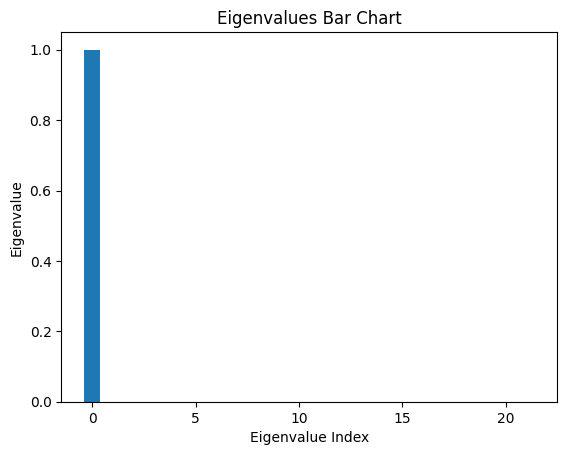

In [20]:
# cov_mat = np.cov(data.T)

# # From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
# eigenvalues, eigen_vecs = np.linalg.eig(cov_mat)
# print(eigenvalues)
# Perform PCA
pca = PCA()
pca.fit(data)

# Compute the Eigenvalues and visualize them as a scree plot
eigenvalues = pca.explained_variance_

print(eigenvalues)
plt.bar(range(len(eigenvalues)), eigenvalues/np.sum(eigenvalues))
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues Bar Chart')
plt.show()


In [ ]:

# Allow the user to select the intrinsic dimensionality index (di)
di = int(input('Enter the intrinsic dimensionality index (di): '))

# Perform PCA with the selected number of components
pca = PCA(n_components=di)
pca.fit(data)
transformed_data = pca.transform(data)

# Plot the data in a PCA-based biplot
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.show()


In [ ]:

# Get the attributes with the highest squared sum of PCA loadings
loadings = pca.components_
loadings_sum = np.sum(loadings**2, axis=0)
top_attributes = np.argsort(loadings_sum)[-4:]

# Print the top attributes
print('Top attributes:')
for attribute in top_attributes:
    print(data.columns[attribute])

In [ ]:

# Construct a scatterplot matrix using the top attributes
scatterplot_data = data.iloc[:, top_attributes]
pd.plotting.scatter_matrix(scatterplot_data)
plt.show()


In [ ]:

# Use k-means to find clusters
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Visualize the elbow method
plt.plot(k_values, inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()